
Lineal: m = -192.86 nT/milenio

1D: m = -103.683 nT/milenio

2D: m = -48.91 nT/milenio

3D: m = -19.078 nT/milenio


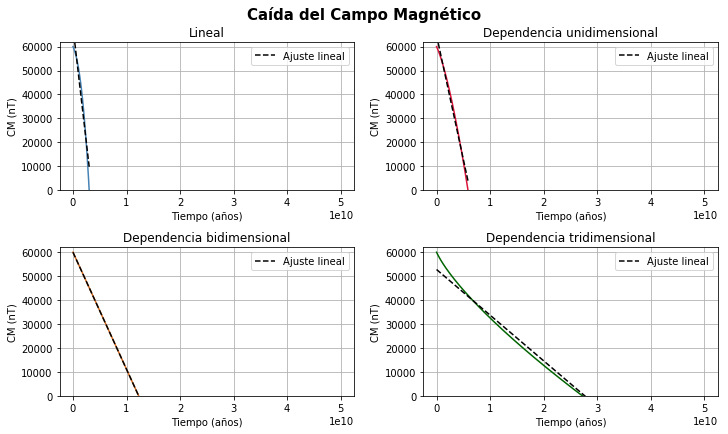

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import * 

#radios
a=6371.2e3 #tierra (m)
b=1212e3 #nucleo interno (m)
c=3485e3 #nucleo externo (m)

#velocidades
V=0.75e-3


#velocidad constante
def r_fun(v,t):
    return b+(v*t)

#velocidad radio
def rr_fun(v,t):
    return b*((1+(2*v*t/b))**(1/2))

#velocidad area
def ra_fun(v,t):
    return b*((1+(3*v*t/b))**(1/3))

#velocidad volumen 
def rv_fun(v,t):
    return b*((1+(4*v*t/b))**(1/4))

#tiempos
t=np.linspace(0,5e10,1000)


#campo magnético
def B_fun(r):
    return 60000*((c**3-r**3)/(c**3-b**3))


#lineal
B_l=B_fun(r_fun(V,t))


#radio
B_r=B_fun(rr_fun(V,t))


#area
B_a=B_fun(ra_fun(V,t))


#volumen
B_v=B_fun(rv_fun(V,t))


#graficos
fig, [[ax33, ax34], [ax43,ax44]]  = plt.subplots(nrows=2, ncols=2, figsize=(10,6), constrained_layout=True)

fig.suptitle('Caída del Campo Magnético',fontsize=15, weight='bold')


#velocidad linal

#ajuste recta
tl=np.linspace(0,0.304e10,1000)
Bl=B_fun(r_fun(V,tl))
m_l,b_l = polyfit(tl, Bl, 1) 

#gráfico
ax33.plot(t,B_l,color='steelblue')
ax33.plot(tl, m_l*tl+b_l, 'k',linewidth=1.5, linestyle="--",label='Ajuste lineal')
ax33.set_ylim(0,62000)
ax33.grid()
ax33.legend(loc=1)
ax33.set_title('Lineal')
ax33.set_ylabel("CM (nT)")
ax33.set_xlabel("Tiempo (años)")


#velocidad radio

#ajuste recta
tr=np.linspace(0,0.59e10,1000)
Br=B_fun(rr_fun(V,tr))
m_r,b_r = polyfit(tr, Br, 1) 

#gráfico
ax34.plot(t,B_r,color='crimson');
ax34.plot(tr, m_r*tr+b_r, 'k',linewidth=1.5, linestyle="--",label='Ajuste lineal')
ax34.set_ylim(0,62000)
ax34.grid()
ax34.legend(loc=1)
ax34.set_title('Dependencia unidimensional')
ax34.set_ylabel("CM (nT)")
ax34.set_xlabel("Tiempo (años)")


#velocidad area

#ajuste recta
ta=np.linspace(0,1.23e10,1000)
Ba=B_fun(ra_fun(V,ta))
m_a,b_a= polyfit(ta, Ba, 1) 

#gráfico
ax43.plot(t,B_a,color='chocolate');
ax43.plot(ta, m_a*ta+b_a, 'k',linewidth=1.5, linestyle="--",label='Ajuste lineal')
ax43.set_ylim(0,62000)
ax43.grid()
ax43.legend(loc=1)
ax43.set_title('Dependencia bidimensional')
ax43.set_ylabel("CM (nT)")
ax43.set_xlabel("Tiempo (años)")


#velocidad volumen

#ajuste recta
tv=np.linspace(0,4.08e10,1000)
Bv=B_fun(rv_fun(V,tv))
m_v,b_v = polyfit(tv, Bv, 1) 

#gráfico
ax44.plot(t,B_v,color='darkgreen');
ax44.plot(tv, m_v*tv+b_v, 'k',linewidth=1.5, linestyle="--",label='Ajuste lineal')
ax44.set_ylim(0,62000)
ax44.grid()
ax44.legend(loc=1)
ax44.set_title('Dependencia tridimensional')
ax44.set_ylabel("CM (nT)")
ax44.set_xlabel("Tiempo (años)");

plt.savefig("campo_ajuste.jpg")

print()
print('Lineal: m =', round(m_l*10**7,3), 'nT/milenio')
print()
print('1D: m =', round(m_r*10**7,3), 'nT/milenio')
print()
print('2D: m =', round(m_a*10**7,3), 'nT/milenio')
print()
print('3D: m =', round(m_v*10**7,3), 'nT/milenio')


Recta 1: m = -97.198 nT/milenio

Recta 2: m = -68.356 nT/milenio

Recta 3: m = -91.859 nT/milenio


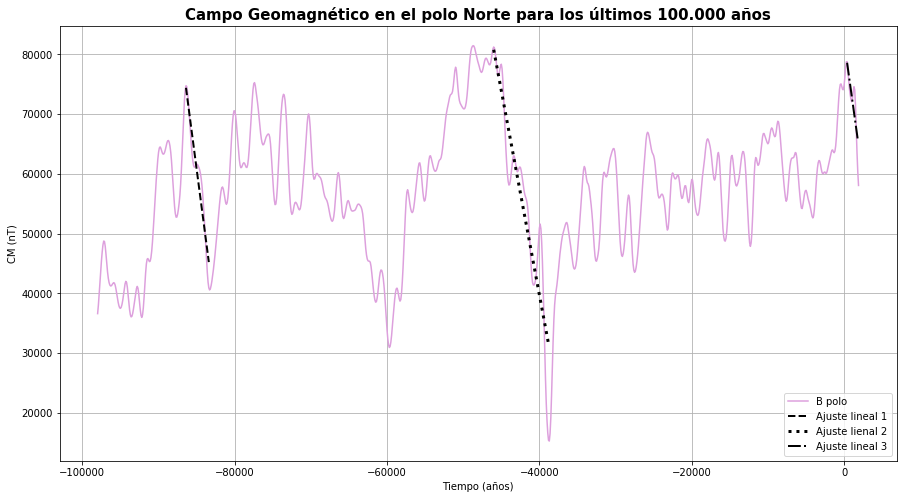

In [160]:
#fichero a df
with open('ggf100k_polo_norte.dat','r') as f:
       df = pd.DataFrame(l.rstrip().split() for l in f)
        
df.columns=['Tiempo','B polo']

df.head(15)


#de str a int-float
df['Tiempo'] = df['Tiempo'].astype(int)
df['B polo'] = df['B polo'].astype(float)


#ajuste recta 1
x1 = df.iloc[116:147,0]
y1 = df.iloc[116:147,1]

m1,b1 = polyfit(x1, y1, 1) 

#ajuste reacta 2
x2 = df.iloc[520:593,0] 
y2 = df.iloc[520:593,1]

m2,b2 = polyfit(x2, y2, 1) 

#ajuste recta 3
x3 = df.iloc[984:999,0]
y3 = df.iloc[984:999,1]

m3,b3 = polyfit(x3, y3, 1) 


#gráfico
fig,ax = plt.subplots(figsize=(15,8))

ax.plot(x, y, color='plum')
ax.plot(x1, m1*x1+b1, '--k',label='Ajuste lineal 1',linewidth=2) 
ax.plot(x2, m2*x2+b2, ':k',label='Ajuste lienal 2',linewidth=3)
ax.plot(x3, m3*x3+b3, '-.k',label='Ajuste lineal 3',linewidth=2)
ax.set_ylabel('CM (nT)')
ax.set_xlabel('Tiempo (años)')
ax.set_title('Campo Geomagnético en el polo Norte para los últimos 100.000 años',fontsize=15, weight='bold')
ax.grid()
ax.legend(loc=4)


plt.savefig("campopolo.jpg")

print()
print('Recta 1: m =', round(m1*10,3), 'nT/milenio')
print()
print('Recta 2: m =', round(m2*10,3), 'nT/milenio')
print()
print('Recta 3: m =', round(m3*10,3), 'nT/milenio')

***